In [2]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in dataframes
clean_df = pd.read_csv('../Dataset/cleaned_data.csv')
clean_df.head()

orig_df = pd.read_csv('../Dataset/TEDSA_PUF_2020.csv')
orig_df.head()

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2020,125137,1,-9,2,4,4,-9,-9,2,...,0,0,0,0,0,0,4,2,1,2
1,2020,213872,1,-9,4,2,7,3,0,7,...,0,0,0,0,0,0,4,2,0,2
2,2020,1098409,1,-9,1,-9,7,-9,0,7,...,0,0,0,0,0,0,9,4,0,2
3,2020,955089,1,-9,4,1,5,2,0,7,...,0,0,0,0,0,0,6,3,0,2
4,2020,907960,1,-9,2,1,6,-9,2,3,...,0,0,0,0,0,0,6,3,0,1


In [5]:
clean_df.columns

Index(['ADMYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'NOPRIOR', 'PSOURCE', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'DSMCRIT',
       'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3',
       'ROUTE1', 'ROUTE2', 'ROUTE3', 'FREQ1', 'FREQ2', 'FREQ3', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG',
       'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG',
       'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG',
       'DIVISION', 'REGION', 'IDU', 'ALCDRUG', 'GENDER_LABEL',
       'ETHNICITY_LABEL', 'AGE_LABEL', 'Location_by_region',
       'Location_by_division', 'Primary_Drug_Preference', 'Location_by_state'],
      dtype='object')

In [6]:
#Recode Race
# Race
race_label = {1: 'Alaska Native (Aleut, Eskimo, Indian)', 2: 'American Indian (other than Alaska Native)', 3: 'Asian or Pacific Islander', 4: 'Black or African American', 5: 'White', 6: 'Asian', 7: 'Other single race', 8: 'Two or more races', 9: 'Native Hawaiian or Other Pacific Islander', -9: 'Missing/unknown/not collected/invalid'}

# New coulmn named Race_Label
clean_df['RACE_LABEL'] = clean_df['RACE'].map(race_label)

race_count = pd.DataFrame(clean_df['RACE_LABEL'].value_counts().reset_index())
    
# Print
race_count

,RACE_LABEL,count
0,White,916884
1,Black or African American,242728
2,Other single race,102804
3,Missing/unknown/not collected/invalid,65593
4,American Indian (other than Alaska Native),43594
5,Two or more races,28285
6,Asian,8260
7,Native Hawaiian or Other Pacific Islander,5115
8,"Alaska Native (Aleut, Eskimo, Indian)",2928
9,Asian or Pacific Islander,166


In [7]:
#For Race, create percentage column and drop missing
# race_count = race_count.drop(labels=[3], axis=0)
pop_total = sum(race_count['count'])
race_count['percent'] = race_count['count']/pop_total*100
race_count

,RACE_LABEL,count,percent
0,White,916884,64.735374
1,Black or African American,242728,17.137487
2,Other single race,102804,7.258340
3,Missing/unknown/not collected/invalid,65593,4.631106
4,American Indian (other than Alaska Native),43594,3.077896
5,Two or more races,28285,1.997025
6,Asian,8260,0.583186
7,Native Hawaiian or Other Pacific Islander,5115,0.361138
8,"Alaska Native (Aleut, Eskimo, Indian)",2928,0.206728
9,Asian or Pacific Islander,166,0.011720


In [8]:
#For Ethnicity, create percentage column 
ethnic_count = pd.DataFrame(clean_df['ETHNICITY_LABEL'].value_counts().reset_index())
pop_total = sum(ethnic_count['count'])
ethnic_count['percent'] = ethnic_count['count']/pop_total*100
ethnic_count

,ETHNICITY_LABEL,count,percent
0,Not Hispanic or Latino,1153503,81.441543
1,Unknown,63676,4.495759
2,Mexican,59291,4.186162
3,Puerto Rican,48170,3.400979
4,Cuban,46199,3.261819
5,Hispanic or Latino,45518,3.213738


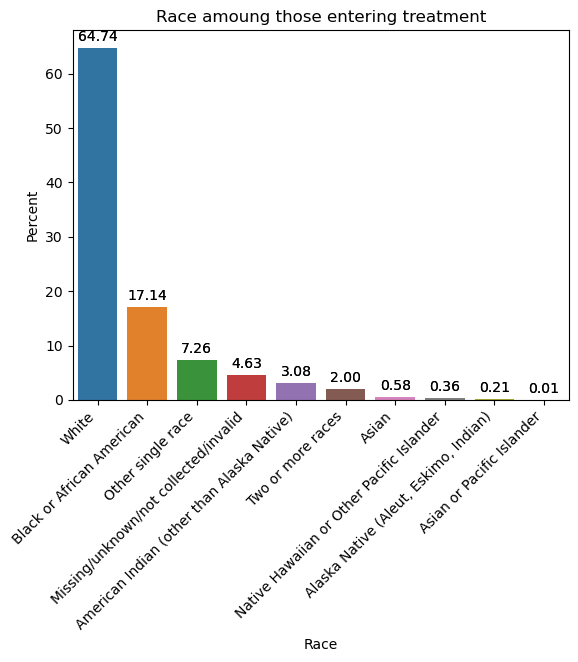

In [9]:
# Create bar chart for race 

plt.bar(race_count['RACE_LABEL'],race_count['percent'], color= "Blue", alpha = .9, align = "center")

plots = sns.barplot(x=race_count['RACE_LABEL'], y=race_count['percent'], data=race_count)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Race")
plt.ylabel("Percent")
plt.xticks(rotation=45, ha='right')
plt.title("Race amoung those entering treatment")
plt.show()

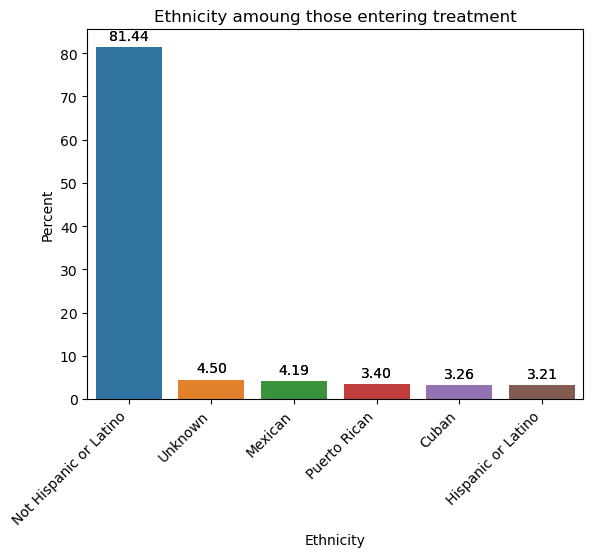

In [10]:
# Create bar chart for ethnicity 

plt.bar(ethnic_count['ETHNICITY_LABEL'],ethnic_count['percent'], color= "Green", alpha = .9, align = "center")
plt.xticks(rotation=45, ha='right')

plots = sns.barplot(x=ethnic_count['ETHNICITY_LABEL'], y=ethnic_count['percent'], data=ethnic_count)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Ethnicity")
plt.ylabel("Percent")
plt.title("Ethnicity amoung those entering treatment")
plt.show()

In [134]:
# 11/16 create new variable for combined Race/Ethnicity

# New dataset only with race/ethnicity data and new variable to hold combined information
race_eth_df = clean_df[['CASEID','RACE_LABEL', 'ETHNICITY_LABEL']]
race_eth_df['Combined'] = pd.Series()

# Applies rule: if ethnicity is "not hispanic or latino" or 'unknown', then combined is race_label, else combined is 'Hispanic or Latino'
# for i in row:
#     if

race_eth_df['Combined'] = race_eth_df['RACE_LABEL'].where(race_eth_df['ETHNICITY_LABEL'].eq('Not Hispanic or Latino'))

race_eth_df['Combined'].fillna('Hispanic or Latino', inplace=True)

race_eth_df.head()

C:\Users\raols\AppData\Local\Temp\ipykernel_3396\2807003868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_eth_df['Combined'] = pd.Series()
C:\Users\raols\AppData\Local\Temp\ipykernel_3396\2807003868.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_eth_df['Combined'] = race_eth_df['RACE_LABEL'].where(race_eth_df['ETHNICITY_LABEL'].eq('Not Hispanic or Latino'))
C:\Users\raols\AppData\Local\Temp\ipykernel_3396\2807003868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,CASEID,RACE_LABEL,ETHNICITY_LABEL,Combined
0,125137,Missing/unknown/not collected/invalid,Mexican,Hispanic or Latino
1,213872,Missing/unknown/not collected/invalid,Not Hispanic or Latino,Missing/unknown/not collected/invalid
2,1098409,American Indian (other than Alaska Native),Not Hispanic or Latino,American Indian (other than Alaska Native)
3,955089,White,Not Hispanic or Latino,White
4,907960,White,Not Hispanic or Latino,White


In [146]:
# replaces unknown values with race_label

race_eth_df['Combined'] = np.where(race_eth_df['ETHNICITY_LABEL']=='Unknown', race_eth_df['RACE_LABEL'], race_eth_df['Combined'])

# Rename and combine groups to match US census
race_eth_df['Combined'] = np.where(race_eth_df['Combined']=='Two or more races', 'Other', race_eth_df['Combined'])
race_eth_df['Combined'] = np.where(race_eth_df['Combined']=='Other single race', 'Other', race_eth_df['Combined'])
race_eth_df['Combined'] = np.where(race_eth_df['Combined']=='Alaska Native (Aleut, Eskimo, Indian)', 'American Indian', race_eth_df['Combined'])
race_eth_df['Combined'] = np.where(race_eth_df['Combined']=='American Indian (other than Alaska Native)', 'American Indian', race_eth_df['Combined'])
race_eth_df['Combined'] = np.where(race_eth_df['Combined']=='Asian or Pacific Islander', 'Asian', race_eth_df['Combined'])

# Drop missing/unknown
race_eth_df = race_eth_df.loc[race_eth_df['Combined'] != 'Missing/unknown/not collected/invalid',:]

race_eth_df['Combined'].value_counts()

C:\Users\raols\AppData\Local\Temp\ipykernel_3396\1235074931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_eth_df['Combined'] = np.where(race_eth_df['ETHNICITY_LABEL']=='Unknown', race_eth_df['RACE_LABEL'], race_eth_df['Combined'])
C:\Users\raols\AppData\Local\Temp\ipykernel_3396\1235074931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_eth_df['Combined'] = np.where(race_eth_df['Combined']=='Two or more races', 'Other', race_eth_df['Combined'])
C:\Users\raols\AppData\Local\Temp\ipykernel

Combined
White                                        840515
Black or African American                    233253
Hispanic or Latino                           199178
American Indian                               43506
Other                                         38761
Asian                                          7688
Native Hawaiian or Other Pacific Islander      3695
Name: count, dtype: int64

In [148]:
# Create dataset of combined summary
race_count2 = pd.DataFrame(race_eth_df['Combined'].value_counts().reset_index())

#For Race, create percentage column and drop missing
# race_count = race_count.drop(labels=[3], axis=0)
pop_total2 = sum(race_count2['count'])
race_count2['percent'] = race_count2['count']/pop_total2*100


# Print
race_count2

,Combined,count,percent
0,White,840515,61.504278
1,Black or African American,233253,17.068175
2,Hispanic or Latino,199178,14.574754
3,American Indian,43506,3.183530
4,Other,38761,2.836317
5,Asian,7688,0.562566
6,Native Hawaiian or Other Pacific Islander,3695,0.270380


In [151]:
# Add census percent
# https://www.npr.org/2021/08/13/1014710483/2020-census-data-us-race-ethnicity-diversity
us_census_per = {'American Indian': 0.7 , 'Asian': 5.9, 'Black or African American': 12.1, 'White': 57.8,'Other': 4.6,'Native Hawaiian or Other Pacific Islander': 0.2, 'Hispanic or Latino' : 18.7}
race_count2['us_percent'] = race_count2['Combined'].map(us_census_per)

us_census_count = {'American Indian': 2252000 , 'Asian': 19619000, 'Black or African American': 39940000, 'White': 191698000,'Other': 15239000,'Native Hawaiian or Other Pacific Islander': 622000, 'Hispanic or Latino' : 62080000}
race_count2['us_count'] = race_count2['Combined'].map(us_census_count)

race_count2

,Combined,count,percent,us_percent,us_count
0,White,840515,61.504278,57.8,191698000
1,Black or African American,233253,17.068175,12.1,39940000
2,Hispanic or Latino,199178,14.574754,18.7,62080000
3,American Indian,43506,3.183530,0.7,2252000
4,Other,38761,2.836317,4.6,15239000
5,Asian,7688,0.562566,5.9,19619000
6,Native Hawaiian or Other Pacific Islander,3695,0.270380,0.2,622000


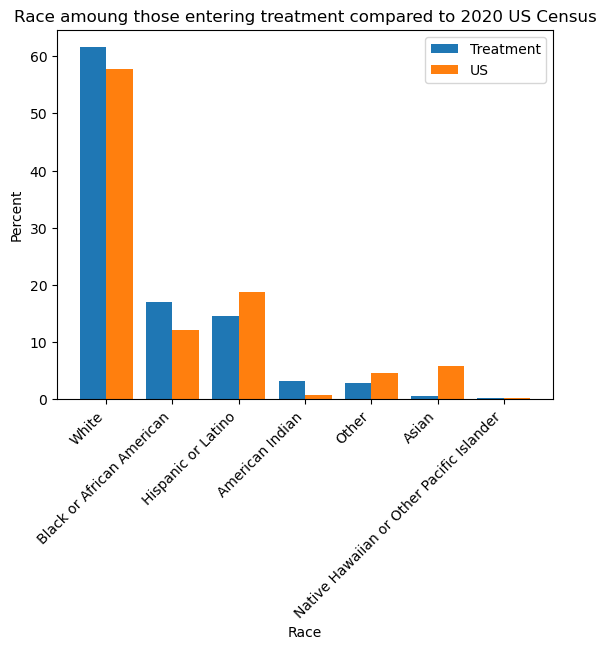

In [159]:
# Bar chart comparing US to treatment pop

X_axis = np.arange(len(race_count2)) 
  
plt.bar(X_axis - 0.2, race_count2['percent'], 0.4, label = 'Treatment') 
plt.bar(X_axis + 0.2, race_count2['us_percent'], 0.4, label = 'US') 

# plt.bar(race_count['RACE_LABEL'],race_count['percent'], color= "Blue", alpha = .9, align = "center")

# plots = sns.barplot(x=race_count2['Combined'], y=race_count2['percent'], data=race_count2)
# for bar in plots.patches:
#     plots.annotate(format(bar.get_height(), '.2f'), 
#                    (bar.get_x() + bar.get_width() / 2, 
#                     bar.get_height()), ha='center', va='center',
#                    size=10, xytext=(0, 8),
#                    textcoords='offset points')

plt.xlabel("Race")
plt.ylabel("Percent")
plt.xticks(rotation=45, ha='right')
plt.title("Race amoung those entering treatment compared to 2020 US Census")
plt.xticks(X_axis, race_count2['Combined'])
plt.legend()
plt.show()




In [164]:
# Calculate critical value for chi square for treatment vs US

Critical_value = stats.chi2.ppf(q = .95, df = 6)

Critical_value



12.591587243743977

In [165]:
# Calculate chi square for treatment vs US

stats.chisquare(race_count2['percent'], race_count2['us_percent'])

Power_divergenceResult(statistic=17.528139916020287, pvalue=0.0075262073766896)

In [13]:
# New dataset to include only variables relevant to drug reported at admissions, DSM criteria, and demos
drugs_entry = clean_df[['ADMYR', 'CASEID', 'DSMCRIT',
       'AGE', 'RACE','ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG',
       'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG',
       'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG']]

drugs_entry.head()

,ADMYR,CASEID,DSMCRIT,AGE,RACE,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,...,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG
0,2020,125137,-9,8,-9,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2020,213872,-9,9,-9,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2020,1098409,-9,8,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,955089,7,3,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,907960,4,3,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create new variable to hold told drugs at admission
drugs_entry['Number Drugs at Admission'] = ""
drugs_entry.head()


C:\Users\raols\AppData\Local\Temp\ipykernel_3396\2967105055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_entry['Number Drugs at Admission'] = ""


,ADMYR,CASEID,DSMCRIT,AGE,RACE,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,...,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,Number Drugs at Admission
0,2020,125137,-9,8,-9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
1,2020,213872,-9,9,-9,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,
2,2020,1098409,-9,8,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,
3,2020,955089,7,3,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,
4,2020,907960,4,3,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,


In [17]:
def func(x):
    return x[5]+x[6]+x[7]+x[8]+x[9]+x[10]+x[11]+x[12]+x[13]+x[14]+x[15]+x[16]+x[17]+x[18]+x[19]+x[20]+x[21]+x[22]

drugs_entry['Number Drugs at Admission'] = drugs_entry.apply(func, axis=1)
drugs_entry['Number Drugs at Admission'].describe()

C:\Users\raols\AppData\Local\Temp\ipykernel_3396\2061583529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_entry['Number Drugs at Admission'] = drugs_entry.apply(func, axis=1)


,ADMYR,CASEID,DSMCRIT,AGE,RACE,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,...,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,Number Drugs at Admission
0,2020,125137,-9,8,-9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2020,213872,-9,9,-9,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,2020,1098409,-9,8,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2020,955089,7,3,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,907960,4,3,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


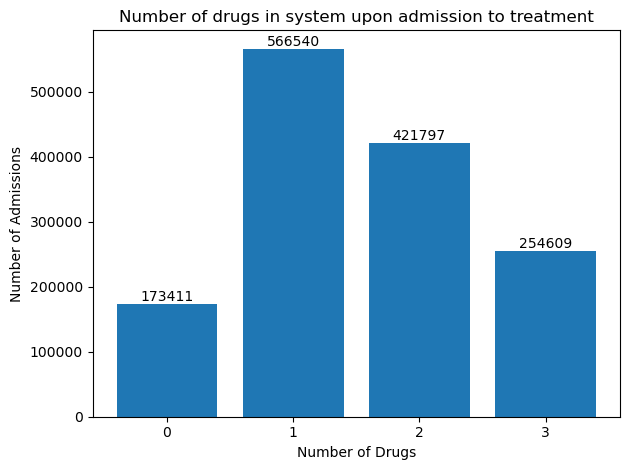

In [99]:
# Histogram of number of drugs upon entry
plt.hist(drugs_entry['Number Drugs at Admission'], bins=np.arange(-0.5, 4.5, 1), align='mid', rwidth=0.8)
plt.xticks(np.arange(0, 4, 1))
plt.xlabel("Number of Drugs")
plt.ylabel("Number of Admissions")
plt.title("Number of drugs in system upon admission to treatment")

for i, count in enumerate(np.bincount(drugs_entry['Number Drugs at Admission'])):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [100]:
# Limit dataset to those with alcohol, opioids, or cocaine
drugs_entry_lim = drugs_entry.loc[(drugs_entry['DSMCRIT'] == 4) | (drugs_entry['DSMCRIT'] == 5) | (drugs_entry['DSMCRIT'] == 6),:]
drugs_entry_lim = drugs_entry_lim[['CASEID','DSMCRIT','Number Drugs at Admission']]
drugs_entry_lim.head()

,CASEID,DSMCRIT,Number Drugs at Admission
4,907960,4,1
8,985217,6,1
11,948700,4,1
15,937677,5,1
16,804338,4,1


In [73]:
drugs_entry_lim.groupby('DSMCRIT').mean('Number Drugs at Admission')

,CASEID,Number Drugs at Admission
DSMCRIT,,
4,639865.749154,1.461545
5,681025.428553,1.617852
6,593025.527275,1.833938


In [102]:
# Create column to label DSM criteria

dsm_label = {4: 'Alcohol dependence', 5: 'Opioid dependence', 6: 'Cocaine dependence'}


drugs_entry_lim['DSM_LABEL'] = drugs_entry_lim['DSMCRIT'].map(dsm_label)
drugs_entry_lim = pd.DataFrame(drugs_entry_lim)
drugs_entry_lim.describe()

,CASEID,DSMCRIT,Number Drugs at Admission
count,5.431110e+05,543111.000000,543111.000000
mean,6.566558e+05,4.630777,1.564386
std,3.789679e+05,0.612317,0.971110
min,1.000000e+00,4.000000,0.000000
25%,3.528695e+05,4.000000,1.000000
50%,6.319220e+05,5.000000,1.000000
75%,9.531810e+05,5.000000,2.000000
max,1.416651e+06,6.000000,3.000000


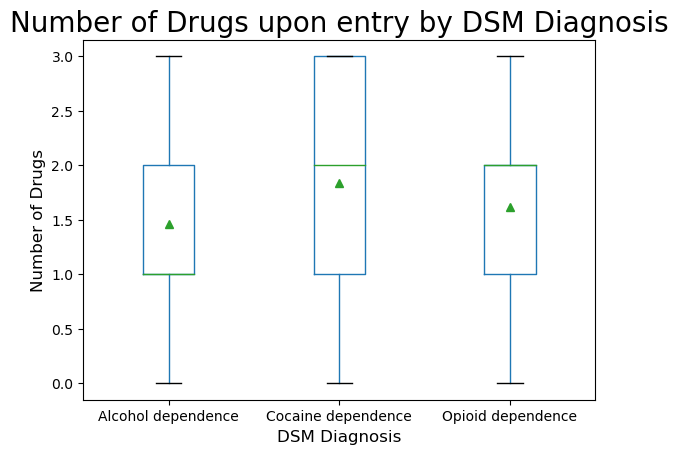

In [104]:
# Boxplot




drugs_entry_lim.boxplot("Number Drugs at Admission", by = "DSM_LABEL", grid = False, showmeans=True)
plt.title('Number of Drugs upon entry by DSM Diagnosis',fontsize =20)
plt.ylabel('Number of Drugs',fontsize = 12)
plt.xlabel('DSM Diagnosis',fontsize = 12)
plt.suptitle('')

plt.show()



In [170]:
# ANOVA test to determine if groups are different

group0 = drugs_entry_lim[drugs_entry_lim['DSMCRIT'] == 4]['Number Drugs at Admission']
group1 = drugs_entry_lim[drugs_entry_lim['DSMCRIT'] == 5]['Number Drugs at Admission']
group2 = drugs_entry_lim[drugs_entry_lim['DSMCRIT'] == 6]['Number Drugs at Admission']

stats.f_oneway(group0,group1, group2)

F_onewayResult(statistic=3267.7180418737967, pvalue=0.0)

In [175]:
# T-test to look at where difference in groups is

stats.ttest_ind(group0, group1, equal_var=False)


TtestResult(statistic=-57.389335925514075, pvalue=0.0, df=504467.1760196625)

In [176]:
stats.ttest_ind(group0, group2, equal_var=False)


TtestResult(statistic=-77.08783500650321, pvalue=0.0, df=52964.90231206665)

In [177]:
stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=-44.28212494555722, pvalue=0.0, df=55101.85047047261)

In [179]:
group0.describe()

count    239099.000000
mean          1.461545
std           0.911025
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: Number Drugs at Admission, dtype: float64

In [180]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is DA81-48F0

 Directory of C:\Users\raols\OneDrive\Documents\GitHub\Project-1\Main

11/20/2023  06:18 PM    <DIR>          .
11/20/2023  06:18 PM    <DIR>          ..
11/09/2023  07:15 PM                19 new_file.py
               1 File(s)             19 bytes
               2 Dir(s)  167,562,940,416 bytes free
